# Obtener Rutas BGP

**Despues de obtenidas las subredes desde la RAI en un CSV de la siguente forma:

i200.91.65.4/30     10.178.85.9              0    100      0 i

 i                   10.178.85.9              0    100      0 i
 
>i200.91.65.8/30     10.178.85.9              0    100      0 i

 i                   10.178.85.9              0    100      0 i
 
>i200.91.65.12/30    10.178.85.9              0    100      0 i

 i                   10.178.85.9              0    100      0 
 
>i200.91.65.16/30    10.178.85.9              0    100      0 i

 i                   10.178.85.9              0    100      0 i
 
>i200.91.65.24/30    10.178.85.9              0    100      0 i

 i                   10.178.85.9              0    100      0 i
 
>i200.91.65.28/30    10.178.85.9              0    100      0 i



**Se deben extraer en una lista de la siguiente manera:

## ['200.91.65.8/30','200.91.65.12/30','200.91.65.16/30','200.91.65.24/30','200.91.65.28/30']


In [2]:
#Importa librerias necesarias


import netaddr as na
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import threading
import concurrent.futures

#%matplotlib inline




In [3]:
#Crea lista con resdes ICE

redes_ice = ['181.193.0.0/16','181.194.0.0/15','200.9.32.0/20','200.9.48.0/20','200.91.64.0/18','200.91.128.0/18','201.191.0.0/16','201.237.0.0/16','201.192.0.0/12']
#redes_ice = ['201.192.0.0/12']


In [6]:
df_interfaces = pd.read_csv('interfaces.csv')
df_usadas = pd.read_csv('rutas.csv')
df_usadas = df_usadas.drop('Unnamed: 0',axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
df_usadas["181.193.0.0/16"].count()

635

In [4]:


#Toma cada item de la lista de redes y las convierte en un IPSet de NetAddress
df_libres_usadas = pd.DataFrame()
for red in redes_ice:    
    naturalIPSet = na.IPSet([str(red)])
    for ruta in df_rutas[str(red)].dropna().to_list():
        naturalIPSet.remove(str(ruta))
    
    df = pd.DataFrame()
    df['Utilizadas'] = df_rutas[red]
    df['Libres'] = pd.Series([str(ip) for ip in naturalIPSet.iter_cidrs()])
    col = pd.MultiIndex.from_arrays([ [red, red],['Utilizadas', 'Libres'] ])
    df.columns = col
    df_libres_usadas = pd.concat([df_libres_usadas,df],axis=1)
 
    


In [5]:
df_libres_usadas

181.193.0.0/16                       181.194.0.0/15                    \
            Utilizadas             Libres        Utilizadas            Libres   
0      181.193.0.16/28     181.193.0.0/28  181.194.38.32/29    181.194.0.0/19   
1      181.193.1.28/30    181.193.0.32/27   181.194.39.4/30   181.194.32.0/22   
2      181.193.1.36/30    181.193.0.64/26  181.194.39.16/30   181.194.36.0/23   
3      181.193.1.52/30   181.193.0.128/25  181.194.39.56/30   181.194.38.0/27   
4     181.193.1.108/30     181.193.1.0/28  181.194.39.88/30  181.194.38.40/29   
..                 ...                ...               ...               ...   
630   181.193.210.0/23  181.193.65.128/26               NaN               NaN   
631  181.193.218.36/30  181.193.65.208/29               NaN               NaN   
632  181.193.218.44/30  181.193.65.224/27               NaN               NaN   
633  181.193.218.52/30    181.193.66.8/29               NaN               NaN   
634  181.193.218.56/30   181.193.66.24/29               NaN               NaN   

       200.9.32.0/20                    200.9.48.0/20                   \
          Utilizadas          Libres       Utilizadas           Libres   
0    200.9.33.128/25   200.9.32.0/24  200.9.48.224/28    200.9.48.0/25   
1     200.9.34.16/28   200.9.33.0/25  200.9.51.192/26  200.9.48.128/26   
2                NaN   200.9.34.0/28              NaN  200.9.48.192/27   
3                NaN  200.9.34.32/27              NaN  200.9.48.240/28   
4                NaN  200.9.34.64/26              NaN    200.9.49.0/24   
..               ...             ...              ...              ...   
630              NaN             NaN              NaN              NaN   
631              NaN             NaN              NaN              NaN   
632              NaN             NaN              NaN              NaN   
633              NaN             NaN              NaN              NaN   
634              NaN             NaN              NaN              NaN   

      200.91.64.0/18                    200.91.128.0/18                    \
          Utilizadas           Libres        Utilizadas            Libres   
0     200.91.64.0/30   200.91.64.8/29   200.91.130.7/32   200.91.128.0/23   
1     200.91.64.4/30  200.91.64.16/30  200.91.130.13/32   200.91.130.0/30   
2    200.91.64.20/30  200.91.64.24/30  200.91.130.14/32   200.91.130.4/31   
3    200.91.64.28/30  200.91.64.32/30  200.91.130.21/32   200.91.130.6/32   
4    200.91.64.36/30  200.91.64.40/29  200.91.130.29/32   200.91.130.8/30   
..               ...              ...               ...               ...   
630              NaN              NaN   200.91.189.9/32  200.91.167.34/31   
631              NaN              NaN  200.91.189.10/32  200.91.167.36/32   
632              NaN              NaN  200.91.189.15/32  200.91.167.38/31   
633              NaN              NaN  200.91.189.16/32  200.91.167.41/32   
634              NaN              NaN  200.91.189.22/32  200.91.167.43/32   

       201.191.0.0/16                      201.237.0.0/16                      \
           Utilizadas           Libres         Utilizadas              Libres   
0      201.191.0.4/32   201.191.0.0/30    201.237.12.0/23      201.237.0.0/21   
1      201.191.0.6/32   201.191.0.5/32  201.237.13.152/30      201.237.8.0/22   
2      201.191.0.7/32  201.191.0.10/31   201.237.14.40/30     201.237.14.0/27   
3      201.191.0.8/32  201.191.0.13/32    201.237.18.0/23    201.237.14.32/29   
4      201.191.0.9/32  201.191.0.17/32    201.237.38.0/25    201.237.14.44/30   
..                ...              ...                ...                 ...   
630  201.191.5.225/32              NaN  201.237.236.22/32  201.237.206.200/32   
631  201.191.5.233/32              NaN  201.237.236.30/32  201.237.206.203/32   
632  201.191.5.234/32              NaN  201.237.236.36/32  201.237.206.205/32   
633  201.191.5.237/32              NaN  201.237.236.37/32  201.237.206.206/31   
634  201.191.5.24

In [12]:
naturalIPSet = na.IPSet()
def libres_usadas():
    for red in redes_ice:

        naturalIPSet = na.IPSet([str(red)])
        for ruta in df_rutas[str(red)].dropna().to_list():
            naturalIPSet.remove(str(ruta))
    return naturalIPSet

with concurrent.futures.ThreadPoolExecutor(max_workers=15) as executor:
    executor.map(libres_usadas, range(15))

In [15]:
naturalIPSet

IPSet([])

In [ ]:
"""
for red in redes_ice:
    naturalIPSet = na.IPSet([str(red)])
    for ruta in df_rutas[str(red)].dropna().to_list():
        naturalIPSet.remove(str(ruta))
        
        for intf in df_interfaces.iterrows():
            try:
                net = na.IPNetwork(str(intf[1][6]))
                net.netmask = str(intf[1][7])
                naturalIPSet.remove(str(net))
            except:
                pass
        """

In [8]:
print(libres_usdas(redes_ice[0]))

IPSet(['181.193.0.0/21', '181.193.8.0/25', '181.193.8.128/28', '181.193.8.144/29', '181.193.8.160/27', '181.193.8.192/26', '181.193.9.0/24', '181.193.10.0/23', '181.193.12.4/30', '181.193.12.8/29', '181.193.12.16/29', '181.193.12.24/30', '181.193.12.32/28', '181.193.12.48/30', '181.193.12.56/29', '181.193.12.64/26', '181.193.12.128/25', '181.193.13.0/24', '181.193.14.0/23', '181.193.16.0/21', '181.193.24.0/25', '181.193.24.128/26', '181.193.24.192/30', '181.193.24.200/29', '181.193.24.212/30', '181.193.24.216/29', '181.193.24.224/27', '181.193.25.0/24', '181.193.26.0/23', '181.193.28.0/24', '181.193.29.0/26', '181.193.29.64/28', '181.193.29.80/29', '181.193.29.88/30', '181.193.29.96/27', '181.193.29.128/25', '181.193.30.0/23', '181.193.32.0/23', '181.193.34.0/25', '181.193.34.128/26', '181.193.34.192/28', '181.193.34.216/29', '181.193.34.224/27', '181.193.35.0/24', '181.193.36.0/23', '181.193.38.0/24', '181.193.39.0/26', '181.193.39.64/29', '181.193.39.72/30', '181.193.39.80/28', '181.

181.193.0.0/16                  
          Utilizadas            Libres
0   181.193.8.152/29    181.193.0.0/21
1    181.193.12.0/30    181.193.8.0/25
2   181.193.12.28/30  181.193.8.128/28
3   181.193.12.52/30  181.193.8.144/29
4  181.193.24.196/30  181.193.8.160/27

In [10]:

df_libres_usadas[[('181.193.0.0/16','Libres'),
                  ('181.194.0.0/15', 'Libres'),
                  ('200.9.32.0/20','Libres'),
                  ('200.9.48.0/20','Libres'),
                  ('200.91.64.0/18','Libres'),
                  ('200.91.128.0/18','Libres'),
                  ('201.191.0.0/16','Libres'),
                  ('201.237.0.0/16','Libres'),
                  ('201.192.0.0/12','Libres')           
                 ]]

,181.193.0.0/16,181.194.0.0/15,200.9.32.0/20,200.9.48.0/20,200.91.64.0/18,200.91.128.0/18,201.191.0.0/16,201.237.0.0/16,201.192.0.0/12
,Libres,Libres,Libres,Libres,Libres,Libres,Libres,Libres,Libres
0,181.193.0.0/21,181.194.0.0/17,200.9.32.0/23,200.9.48.0/20,200.91.64.0/19,200.91.128.0/23,201.191.0.0/20,201.237.0.0/19,201.192.0.0/17
1,181.193.8.0/25,181.194.128.0/18,200.9.34.0/30,NaN,200.91.96.0/20,200.91.130.0/29,201.191.16.0/21,201.237.32.0/20,201.192.128.0/22
2,181.193.8.128/28,181.194.192.0/19,200.9.34.8/29,NaN,200.91.112.0/21,200.91.130.8/31,201.191.24.0/23,201.237.48.0/21,201.192.132.0/23
3,181.193.8.144/29,181.194.224.0/31,200.9.34.16/28,NaN,200.91.120.0/23,200.91.130.11/32,201.191.26.0/24,201.237.56.0/22,201.192.134.0/24
4,181.193.8.160/27,181.194.224.2/32,200.9.34.32/27,NaN,200.91.122.0/32,200.91.130.13/32,201.191.27.0/29,201.237.60.0/24,201.192.135.0/30
...,...,...,...,...,...,...,...,...,...
57,181.193.42.0/26,181.194.224.169/32,NaN,NaN,200.91.122.134/32,200.91.130.160/30,201.191.27.137/32,201.237.61.130/31,201.192.135.140/32
58,181.193.42.64/29,181.194.224.171/32,NaN,NaN,200.91.122.136/30,200.91.130.165/32,201.191.27.138/31,201.237.61.133/32,201.192.135.142/31
59,181.193.42.76/30,181.194.224.172/31,NaN,NaN,200.91.122.140/32,200.91.130.166/31,201.191.27.140/32,201.237.61.134/31,201.192.135.144/30


In [11]:
df_libres = pd.DataFrame()

for red in redes_ice:
    naturalIPSet = na.IPSet([str(red)])
    
    for ruta in df_rutas[str(red)].dropna().to_list():
        naturalIPSet.remove(str(ruta))
        
    l = pd.Series([str(ip) for ip in naturalIPSet.iter_cidrs()])
    df_libres = pd.concat([df_libres,l],axis=1)
    
df_libres.columns = redes_ice

In [13]:
df_libres.to_excel('libres_24_9_2020.xls')

# Obtener informacion de interfaces


In [15]:
for i in df_interfaces.iterrows():
    try:
        net = na.IPNetwork(str(i[1][6]))
        net.netmask = str(i[1][7])
        print(net)
    except:
        pass

10.45.159.5/30
10.45.159.9/30
10.45.159.13/30
10.45.159.17/30
10.45.159.21/30
10.45.159.25/30
10.45.159.29/30
10.45.159.33/30
10.45.159.37/30
10.45.159.41/30
10.45.159.45/30
10.45.159.49/30
10.45.159.53/30
10.45.159.57/30
10.45.159.61/30
10.45.159.65/30
10.45.159.69/30
10.45.159.73/30
10.45.159.77/30
10.45.159.81/30
10.45.159.85/30
10.45.159.89/30
10.45.159.93/30
10.45.159.97/30
10.45.159.101/30
10.45.159.105/30
10.45.159.109/30
10.45.159.113/30
10.45.159.117/30
10.45.159.121/30
10.45.159.125/30
10.45.159.129/30
10.45.159.133/30
10.45.159.137/30
10.45.159.141/30
10.45.159.145/30
10.45.159.149/30
10.45.159.153/30
10.45.159.157/30
10.45.159.161/30
10.45.159.165/30
10.45.159.169/30
10.45.159.173/30
10.45.159.177/30
10.45.159.181/30
10.45.159.185/30
10.45.159.189/30
10.45.159.193/30
10.45.159.197/30
10.45.159.201/30
10.45.159.205/30
10.45.159.209/30
10.45.159.213/30
10.45.159.217/30
10.45.159.221/30
10.45.159.225/30
10.45.159.229/30
10.45.159.233/30
10.45.159.237/30
10.45.159.241/30
10.45.

In [16]:
for i in df_interfaces.iterrows():
    try:
        if str(i[1][6]) == "10.178.138.17":
            print(i[1])
    except:
        pass

date                            2020-10-13
device_name                        SPECO01
id                               136628238
if_admin_status                          1
if_description     ***SPEAG02-ISIS-MPLS***
if_index                               113
if_ipv4                      10.178.138.17
if_maskv4                  255.255.255.252
if_name                  TenGigE0/1/0/1.10
if_oper_status                           1
if_qos_in                              NaN
if_qos_out                             NaN
Name: 238459, dtype: object


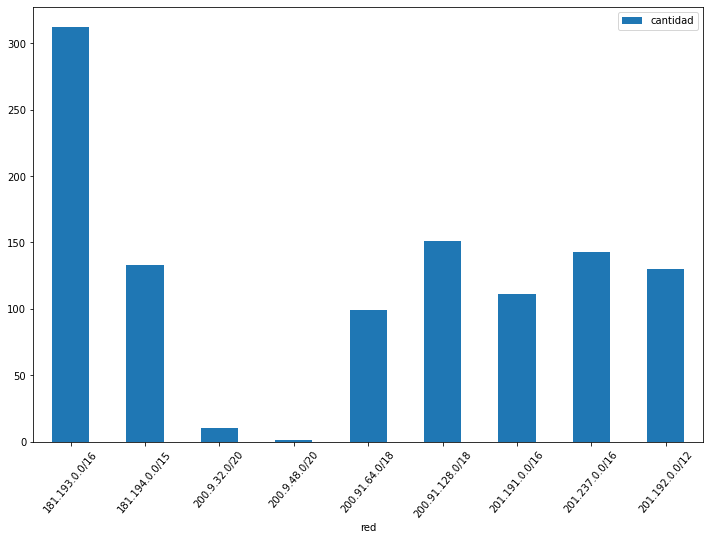

In [14]:
df_libres_count = pd.DataFrame()
df_libres_count['red'] = df_libres.columns
df_libres_count['cantidad'] = [df_libres[i].count() for i in df_libres.columns]
df_libres_count
ax = df_libres_count.plot.bar(x='red', y='cantidad',rot=50,figsize=(12,8))

In [15]:
df_libres_count

,red,cantidad
0,181.193.0.0/16,312
1,181.194.0.0/15,133
2,200.9.32.0/20,10
3,200.9.48.0/20,1
4,200.91.64.0/18,99
5,200.91.128.0/18,151
6,201.191.0.0/16,111
7,201.237.0.0/16,143
8,201.192.0.0/12,130


In [ ]:
def get_prefix(red,prefix):
    if na.IPNetwork(str(red)).prefixlen == prefix:
        return red
    else:
        pass
    
    
bits = [i for i in range(12,33)]

df_libres_count = pd.DataFrame()
count_list = [[df_libres[red].dropna().apply(get_prefix,args=([bit])).count() for bit in bits] for red in df_libres.columns]
df_libres_count = pd.DataFrame(count_list,columns=[str(i) for i in range(12,33)],index=df_libres.columns)
df_libres_count

In [ ]:
df_libres_count['24'].plot.bar(figsize=(20,6),rot=0)
plt.savefig('C:\\Users\\Cesar\\PycharmProjects\\pyIPam\\porbit.png')

In [ ]:
df_libres['201.192.0.0/12'].dropna().apply(get_prefix,args=([28])).dropna().reset_index()



In [ ]:
df_29 = pd.DataFrame()
df_28 = pd.DataFrame()
df_12 = pd.DataFrame()

In [ ]:
df_29['29'] = df_libres['201.192.0.0/12'].dropna().apply(get_prefix,args=([29])).dropna()
df_29.reset_index(inplace=True,drop=True)


In [ ]:
df_28['28'] = df_libres['201.192.0.0/12'].dropna().apply(get_prefix,args=([28])).dropna()
df_28.reset_index(inplace=True,drop=True)

In [ ]:
df_12['29'] = df_29

In [ ]:
df_libres['201.192.0.0/12'].dropna().apply(get_prefix,args=([28])).dropna()reset_index(inplace=True,drop=True)


In [ ]:
df_12['27'] = df_libres['201.192.0.0/12'].dropna().apply(get_prefix,args=([27])).dropna().reset_index()

In [ ]:
df_12

In [ ]:
df_libres['201.192.0.0/12'].dropna().apply(get_prefix,args=([24])).dropna()

In [ ]:
df_libres['201.192.0.0/12'].dropna().apply(get_prefix,args=([24])).dropna()

In [ ]:
libres['201.191.0.0/16'] = df_libres['201.191.0.0/16'].dropna().apply(get_prefix,args=([24])).dropna()

In [ ]:
libres.reset_index(inplace=True,drop=True)


In [9]:
rutas2['200.91.64.0/18'].head(50)

0       200.91.64.0/30
1       200.91.64.4/30
2      200.91.64.20/30
3      200.91.64.28/30
4      200.91.64.36/30
5      200.91.64.60/30
6      200.91.64.64/30
7     200.91.64.128/30
8     200.91.64.144/30
9     200.91.64.148/30
10    200.91.64.180/30
11    200.91.64.192/30
12    200.91.64.204/30
13    200.91.64.216/30
14    200.91.64.220/30
15    200.91.64.228/30
16    200.91.64.240/30
17    200.91.64.244/30
18      200.91.65.4/30
19      200.91.65.8/30
20     200.91.65.12/30
21     200.91.65.16/30
22     200.91.65.24/30
23     200.91.65.28/30
24     200.91.65.32/30
25     200.91.65.36/30
26     200.91.65.44/30
27     200.91.65.52/30
28     200.91.65.64/30
29     200.91.65.68/30
30     200.91.65.80/30
31     200.91.65.92/30
32     200.91.65.96/30
33    200.91.65.100/30
34    200.91.65.104/30
35    200.91.65.108/30
36    200.91.65.128/30
37    200.91.65.136/30
38    200.91.65.156/30
39    200.91.65.160/30
40    200.91.65.168/30
41    200.91.65.172/30
42    200.91.65.176/30
43    200.9